In [22]:
from math import log,e
from scipy import stats
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [23]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

In [24]:
def black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0):

  '''Function that estimates the value of a call and put option using the Black Scholes Merton Model.
  
  Parameters
  ----------
  stock_price: Spot market value of the underlying asset
  strike_price: Strike price of the options contract
  rate: Risk free rate
  time: Time to expiration for the options contract
  volatility: Volatility of the asset
  dividend: Dividend or yield of the asset, with a default value set to zero

  Returns
  -------
  [call,put]: Returns a list containing the estimated call and put value of the option contract
  '''

  d1 = (log(stock_price/strike_price) + (rate - dividend + volatility**2/2) * time)/(volatility * time**.5)
  d2 = d1 - volatility * time**.5

  call = stats.norm.cdf(d1) * stock_price*e**(-dividend*time) - stats.norm.cdf(d2)*strike_price*e**(-rate*time)
  put = stats.norm.cdf(-d2)*strike_price*e**(-rate * time) - stats.norm.cdf(-d1) * stock_price*e**(-dividend*time)

  return [call, put]

In [25]:
help(black_scholes_merton)

Help on function black_scholes_merton in module __main__:

black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0)
    Function that estimates the value of a call and put option using the Black Scholes Merton Model.
    
    Parameters
    ----------
    stock_price: Spot market value of the underlying asset
    strike_price: Strike price of the options contract
    rate: Risk free rate
    time: Time to expiration for the options contract
    volatility: Volatility of the asset
    dividend: Dividend or yield of the asset, with a default value set to zero
    
    Returns
    -------
    [call,put]: Returns a list containing the estimated call and put value of the option contract



In [26]:
black_scholes_merton(105,100,.05,1,.25,.01)

[14.932243162306307, 6.099953068715067]

In [27]:
stock_price, strike_price = 100, 100

if strike_price < stock_price:
  print('The call option is in-the-money and the put option is out-of-the-money.')
elif strike_price > stock_price:
  print('The call option is out-of-the-money and the put option is in-the-money.')
else:
  print('The options are at-the-money.')

The options are at-the-money.


# **Changing the parameters of the Model**

## **Underlying Asset Price**

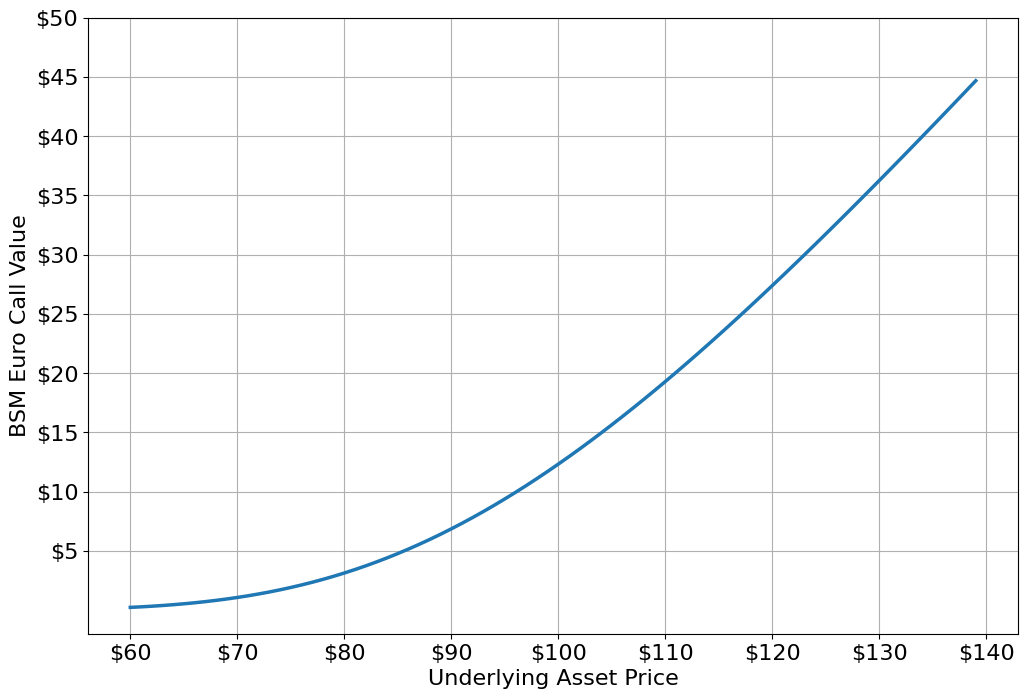

In [28]:
plt.plot(range(60,140),[black_scholes_merton(x,100,.05,1,.25)[0] for x in range(60,140)],lw=2.5)
plt.yticks(range(5,55,5),['$'+str(i) for i in range(5,55,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Underlying Asset Price')
plt.ylabel('BSM Euro Call Value')
plt.grid();

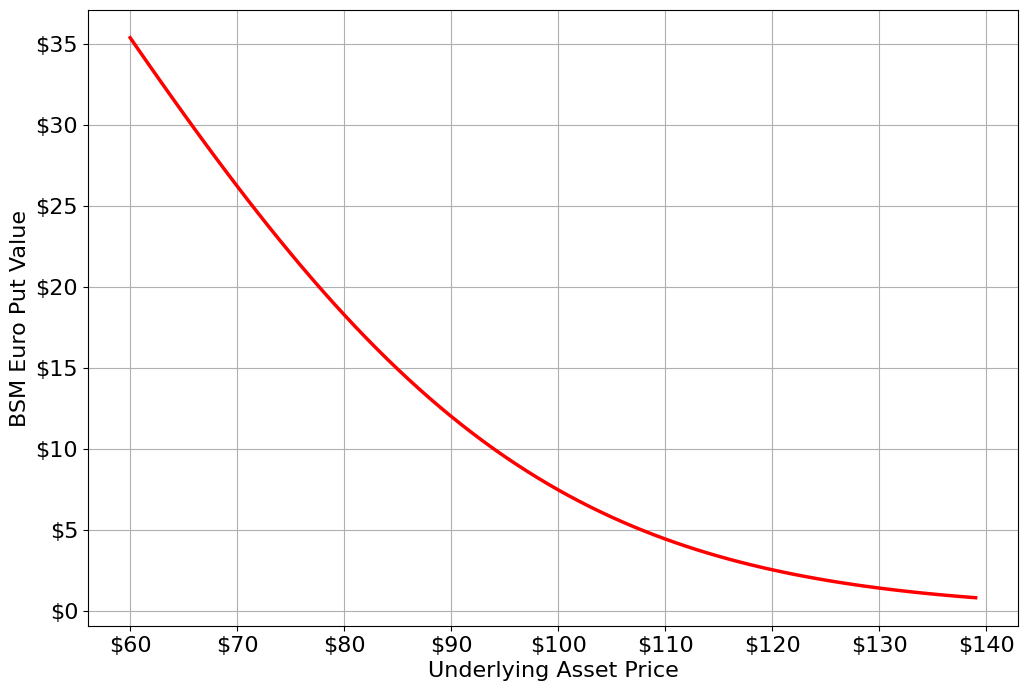

In [29]:
plt.plot(range(60,140),[black_scholes_merton(x,100,.05,1,.25)[1] for x in range(60,140)],lw=2.5,color='red')
plt.yticks(range(0,40,5),['$'+str(i) for i in range(0,40,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Underlying Asset Price')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Strike Price**

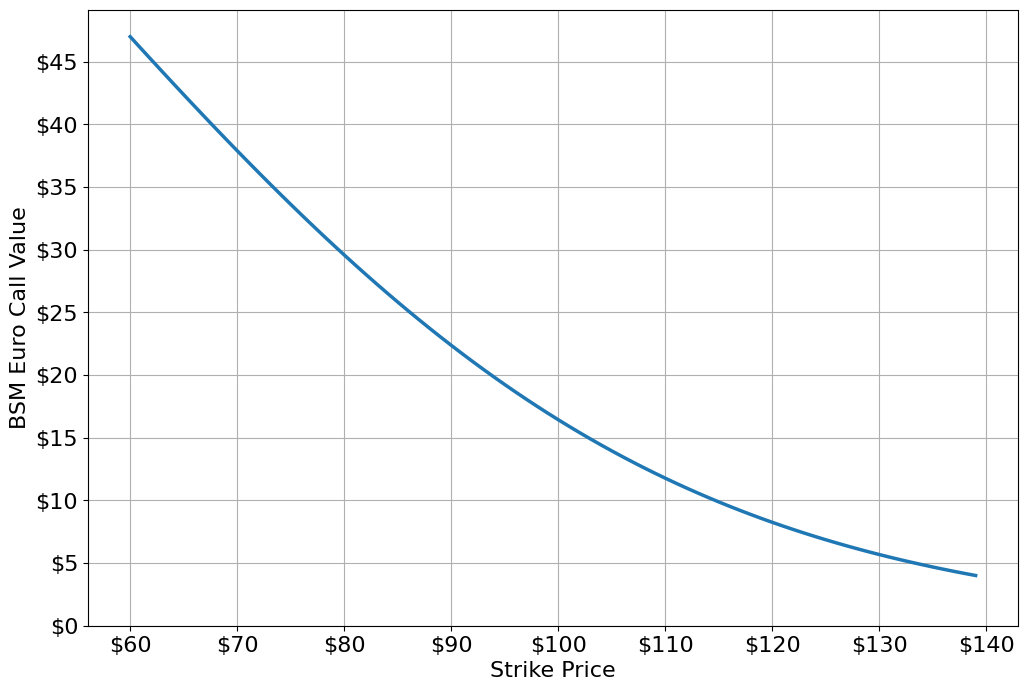

In [30]:
plt.plot(range(60,140),[black_scholes_merton(105,x,.03,1,.3)[0] for x in range(60,140)],lw=2.5)
plt.yticks(range(0,50,5),['$'+str(i) for i in range(0,50,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Strike Price')
plt.ylabel('BSM Euro Call Value')
plt.grid();

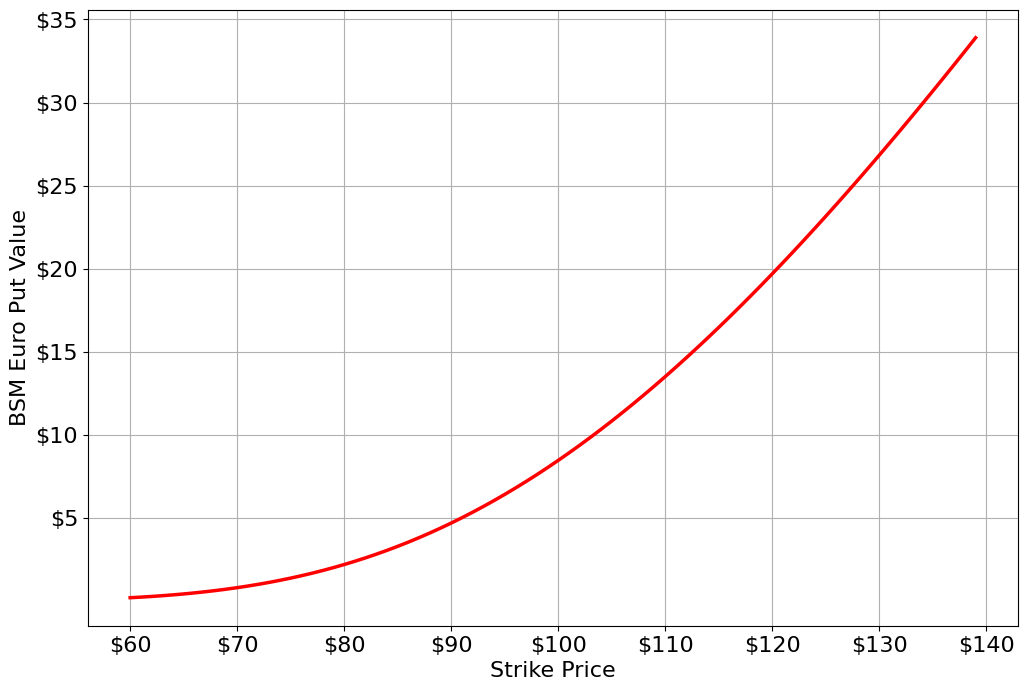

In [31]:
plt.plot(range(60,140),[black_scholes_merton(105,x,.03,1,.3)[1] for x in range(60,140)],lw=2.5, color='red')
plt.yticks(range(5,40,5),['$'+str(i) for i in range(5,40,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Strike Price')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Volatility**

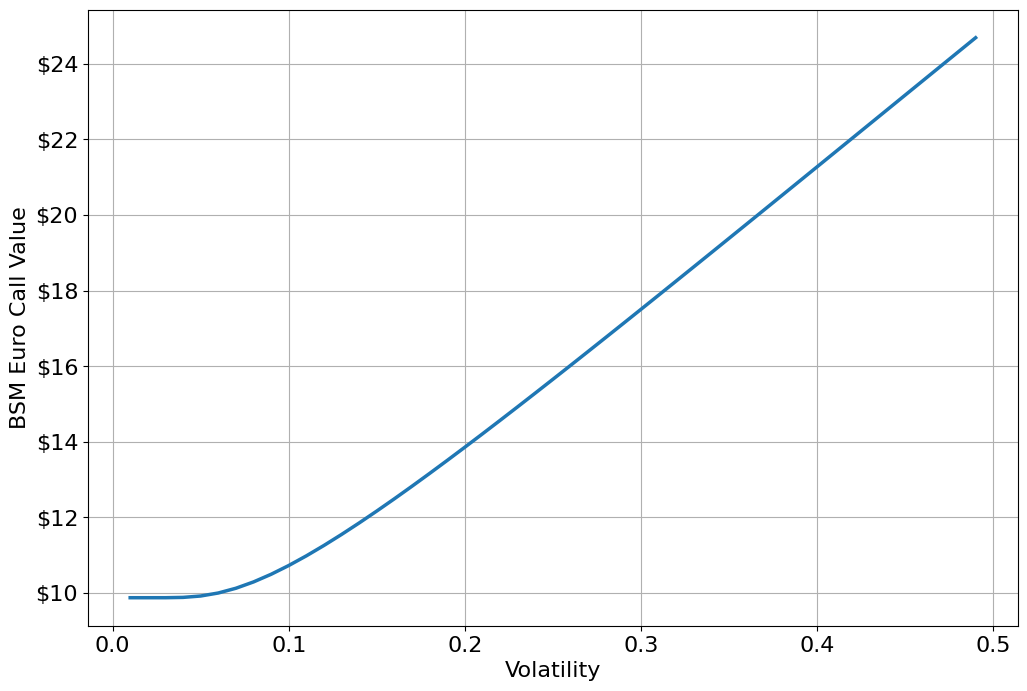

In [32]:
plt.plot(np.arange(.01,.5,.01),[black_scholes_merton(105,100,.05,1,x)[0] for x in np.arange(.01,.5,.01)],lw=2.5)
plt.yticks(range(10,26,2),['$'+str(i) for i in range(10,26,2)])
plt.xlabel('Volatility')
plt.ylabel('BSM Euro Call Value')
plt.grid();

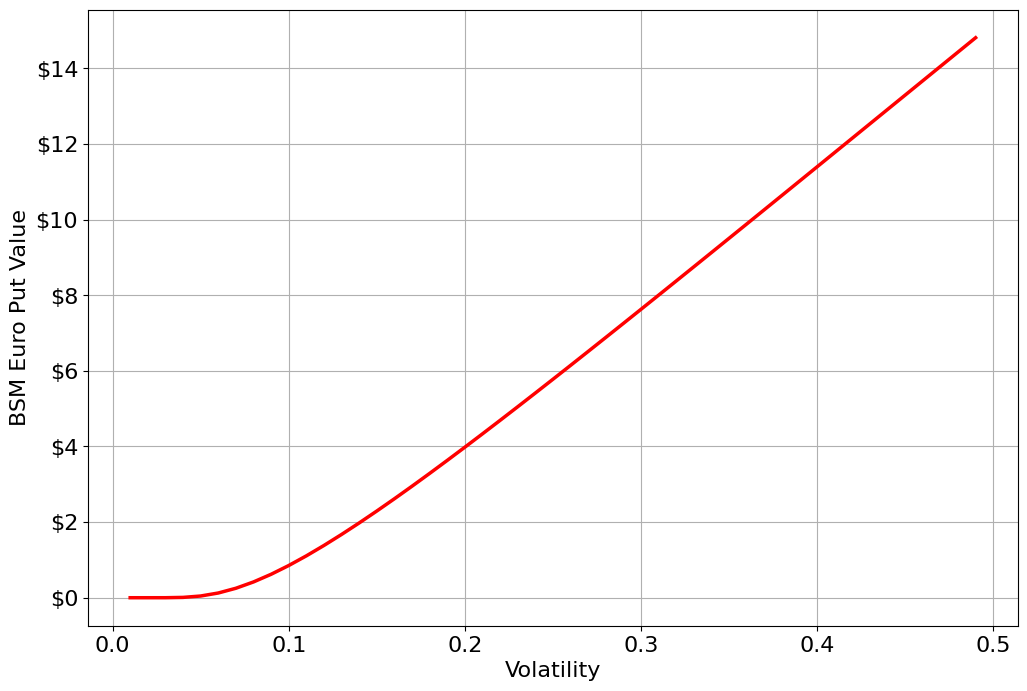

In [33]:
plt.plot(np.arange(.01,.5,.01),[black_scholes_merton(105,100,.05,1,x)[1] for x in np.arange(.01,.5,.01)],lw=2.5,color='red')
plt.yticks(range(0,16,2),['$'+str(i) for i in range(0,16,2)])
plt.xlabel('Volatility')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Time**

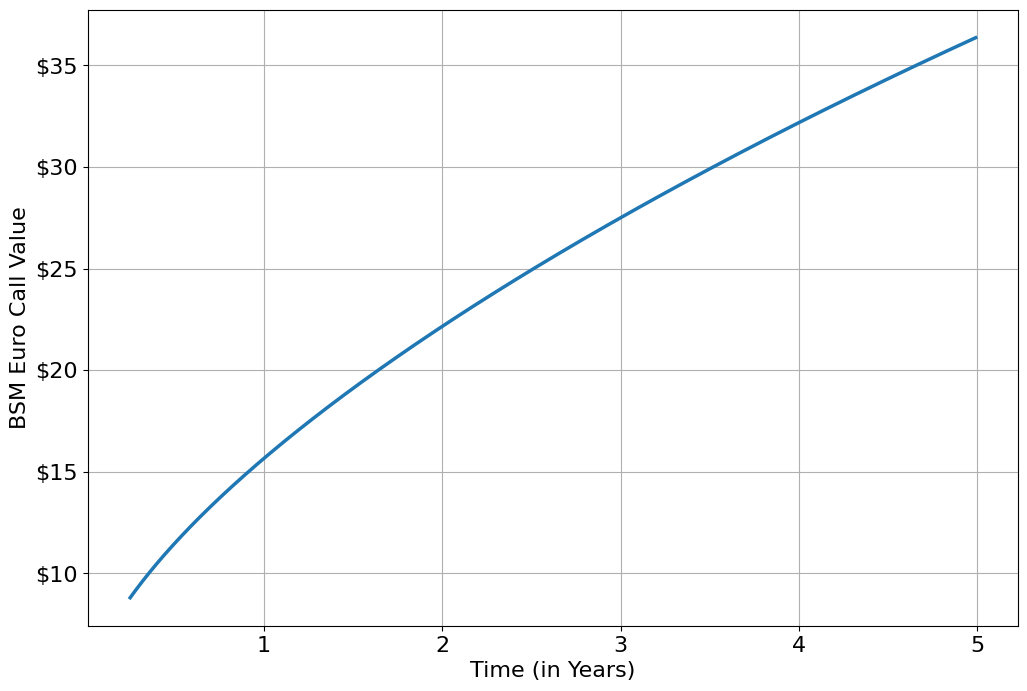

In [34]:
plt.plot(np.arange(.25,5,.01),[black_scholes_merton(105,100,.05,x,.25)[0] for x in np.arange(.25,5,.01)],lw=2.5)
plt.yticks(range(10,40,5),['$'+str(i) for i in range(10,40,5)])
plt.xlabel('Time (in Years)')
plt.ylabel('BSM Euro Call Value')
plt.grid();

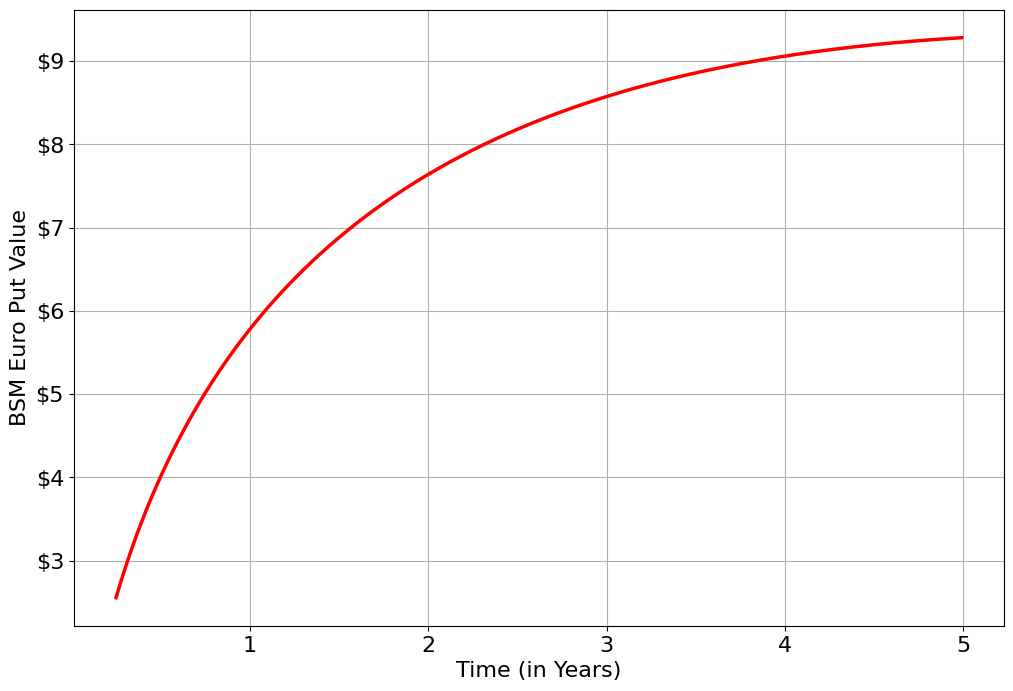

In [35]:
plt.plot(np.arange(.25,5,.01),[black_scholes_merton(105,100,.05,x,.25)[1] for x in np.arange(.25,5,.01)],lw=2.5,color='red')
plt.yticks(range(3,10,1),['$'+str(i) for i in range(3,10,1)])
plt.xlabel('Time (in Years)')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Interest Rates**

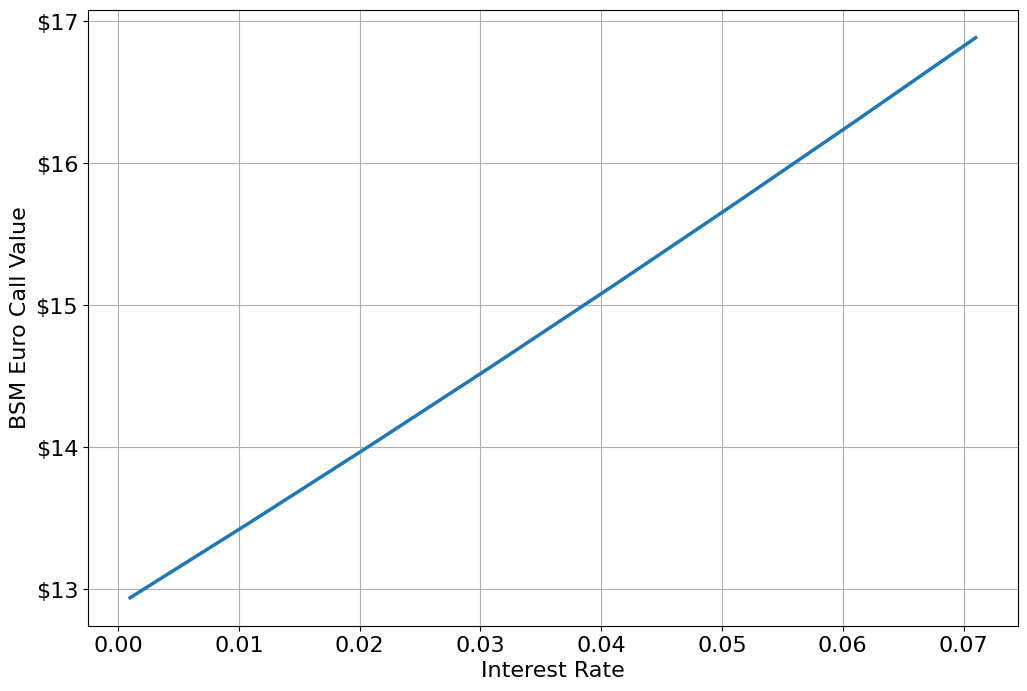

In [36]:
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,x,1,.25)[0] for x in np.arange(.001,.075,.01)],lw=2.5)
plt.yticks(range(13,18,1),['$'+str(i) for i in range(13,18,1)])
plt.xlabel('Interest Rate')
plt.ylabel('BSM Euro Call Value')
plt.grid();

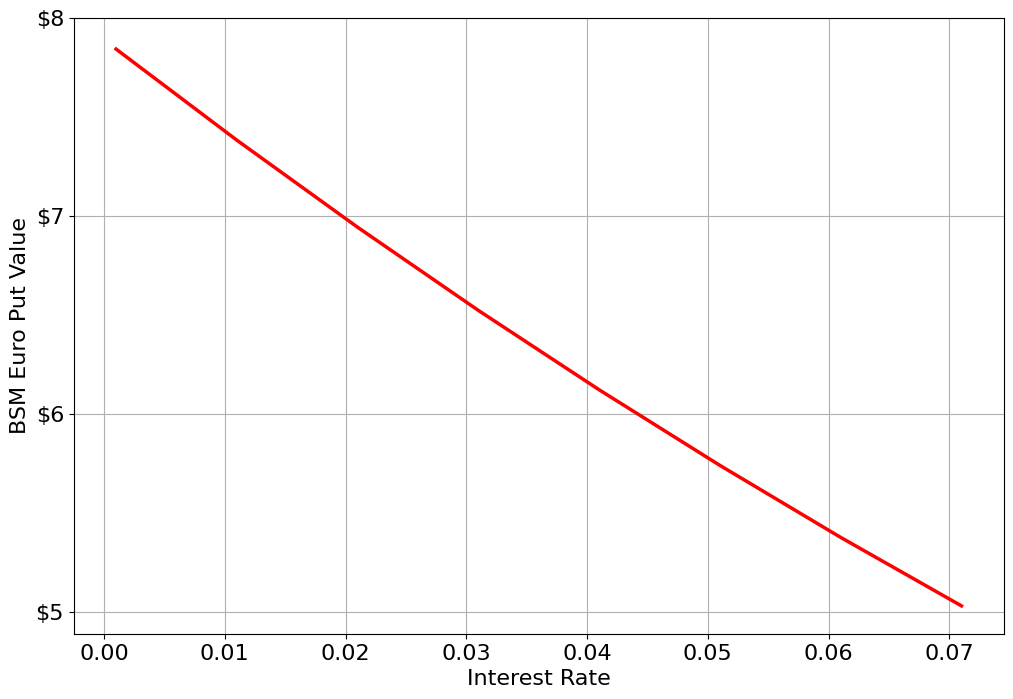

In [37]:
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,x,1,.25)[1] for x in np.arange(.001,.075,.01)],lw=2.5,color='red')
plt.yticks(range(5,9,1),['$'+str(i) for i in range(5,9,1)])
plt.xlabel('Interest Rate')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Dividend Yield**

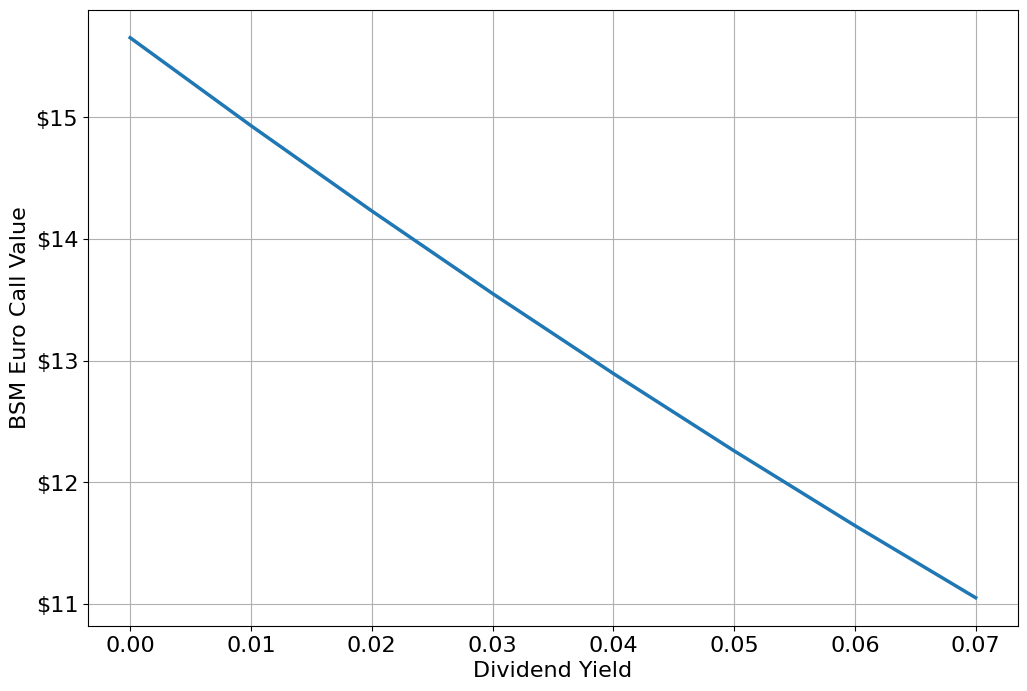

In [38]:
plt.plot(np.arange(0.0,.075,.01),[black_scholes_merton(105,100,.05,1,.25,x)[0] for x in np.arange(0.0,.075,.01)],lw=2.5)
plt.yticks(range(11,16,1),['$'+str(i) for i in range(11,16,1)])
plt.xlabel('Dividend Yield')
plt.ylabel('BSM Euro Call Value')
plt.grid();

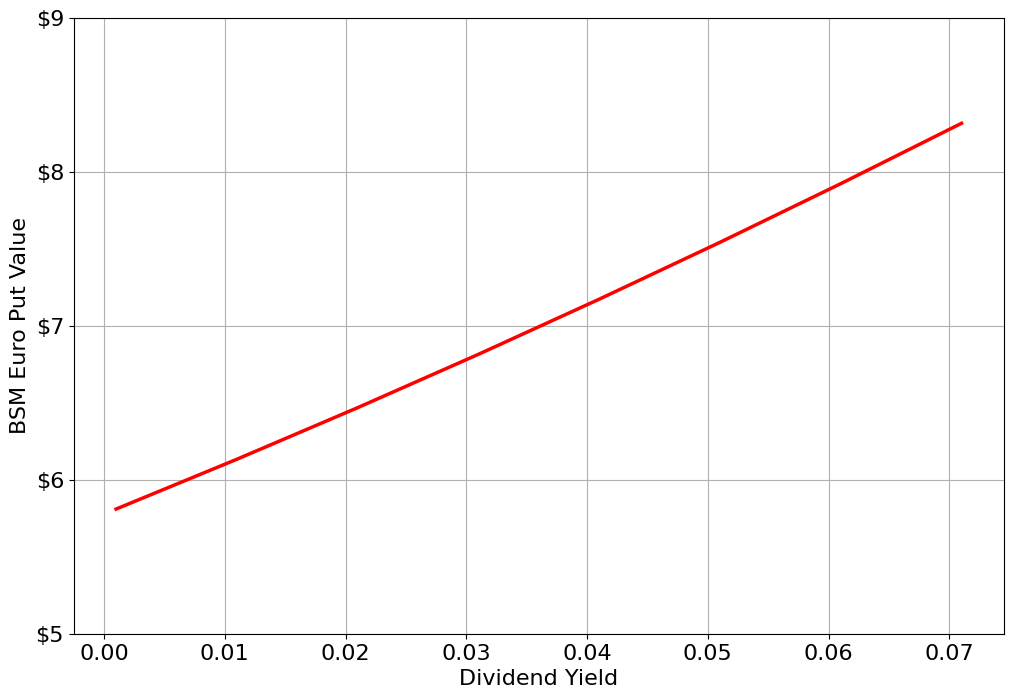

In [39]:
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,.05,1,.25,x)[1] for x in np.arange(.001,.075,.01)],lw=2.5,color='red')
plt.yticks(range(5,10,1),['$'+str(i) for i in range(5,10,1)])
plt.xlabel('Dividend Yield')
plt.ylabel('BSM Euro Put Value')
plt.grid();

# **Comparing the Black Scholes Merton Model to the live market**

In [40]:
def annualized_days(date1, date2):
  return (date2 - date1).days/365

In [41]:
apple_call, apple_put = black_scholes_merton(161.94,160,.001,annualized_days(date.today(),date(2022,2,18)),.2888,.0055)

In [42]:
print(f'Black Scholes Merton Model value for a European Apple Option Call: {apple_call:.2f}\nBlack Scholes value for a European Apple Option Put: {apple_put:.2f}')

Black Scholes Merton Model value for a European Apple Option Call: 1.48+22.05j
Black Scholes value for a European Apple Option Put: -1.48+22.05j


# **Implementation of Black-Scholes formula in Python**

In [43]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [44]:
# Implementation of Black-Scholes formula in Python
import numpy as np
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

# Define variables 
r = 0.01
S = 30
K = 40
T = 240/365
sigma = 0.30

def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [45]:
def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [46]:
def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [47]:
def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [48]:
def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [49]:
def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [50]:
option_type='p'

print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])
print("       Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])
print("       Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])
print("       Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])
print("       Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])
print("       Rho  : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])

Option Price:  [10.251, 10.251]
       Delta:  [-0.849, -0.849]
       Gamma:  [0.032, 0.032]
       Vega :  [0.057, 0.057]
       Theta:  [-0.003, -0.003]
       Rho  :  [-0.235, -0.235]
